#### [ <a href='http://ifni.co'>HOME</a>  ]=====  How to compute like a brain =====[ <a href='http://ifni.co/toc/programming'>Programming</a>  ]

## TEST wrapper

This is very simple tests wrapper, with which you can run many tests compare results, draw plots, calculate metrics.

Nothing fancy but does the work ...

Use it mainly in your python shell.

You can also use DataTest as example of how to initialize and connect Encoder and TM.

---

In [1]:
%matplotlib inline

import sys
sys.path.append('../lib')
sys.path.append('../lib/test')
import numpy as np
from utils import *
from data_test import *

In [2]:
DataSet.list_datasets()

['hot-gym', 'ny', 'sine', 'dollar']

In [3]:
dt = DataTest(data_set='ny')

In [4]:
dt.new_test(name='5x300', data_size=300, nrows=5)

sc> building classification map ...


In [5]:
dt.run_test(name='5x300', begin=0, end=1000)

Adding data metrics with name : 5x300 


In [6]:
dt.results.metrics

{'5x300': {'avg_fill': 0.027104,
  'fill': 0.027104,
  'mae': 2506.9769999999999,
  'mape': 0.17050835420385166,
  'max-fill': 0.094,
  'nll': 1.495726981091561,
  'r2': 0.5512082101100626,
  'rmse': 4477.3462467180261}}

**!! NLL (negactive log likelihood score uses 1000 bins for calulation by default)**

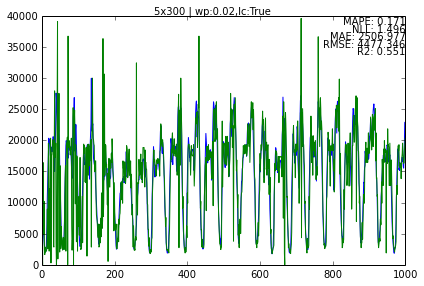

In [7]:
dt.tests['5x300'].plot_data()

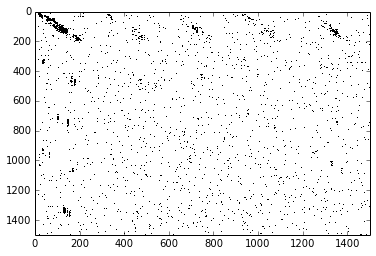

In [8]:
dt.tests['5x300'].tm.memory.show_mem()

In [9]:
dt.tests.keys()

['5x300']

In [10]:
dt.results.series['5x300']['ys'][100:110]

array([8416, 7098, 5826, 4383, 3270, 2948, 3146, 3077, 3000, 4592])

In [11]:
dt.results.series['5x300']['yhat'][100:110]

array([ 8000,  6150, 11000,  4750,  6550, 17250,  4350,  2450,  2600,  2600])

In [12]:
dt.results.tests_list()

{'5x300': {'metrics': {'avg_fill': 0.027104,
   'fill': 0.027104,
   'mae': 2506.9769999999999,
   'mape': 0.17050835420385166,
   'max-fill': 0.094,
   'nll': 1.495726981091561,
   'r2': 0.5512082101100626,
   'rmse': 4477.3462467180261},
  'size': 1000}}

---

**dt.save()** - saves all the objects tests, results, tm,classifier, encoder and data ... later any one of those can be restored separately and  **ClassXX.load()**

---

#### On the fly 

You can also generate the data set on the fly, just use as first character **dot** and then <a href='http://ifni.co/articles/programming/recursion' target='_blank'>PatternLang()</a> spec.

In [2]:
dt = DataTest(data_set=".(12,(5:1000:22))*20")

In [3]:
dt.new_test(name='5x300', nrows=5, data_size=300)

In [4]:
dt.data.data.size

940

In [6]:
dt.run_test(name='5x300',begin=0,end=940)

Adding data metrics with name : 5x300 


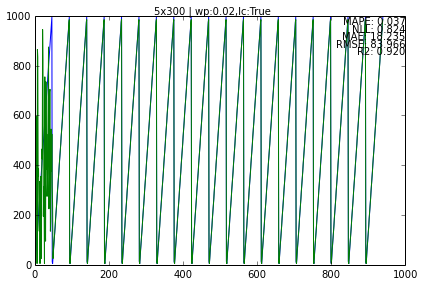

In [7]:
dt.first.plot_data()

You can also see how "jumpines" shows up if don't have enough granularity. f.e. change 1000 => 100 in the pattern i.e. **(12,(5:100:22))*20** 

Default granularity for PatternLang pattern is 10.


---

### Scalar classifier

Scalar classifier uses ScalarEncoder to generate a list of bitstrings. Later when you call best_match() it will find the closest value (by overlap).

In [13]:
from scalar_classifier import *
from scalar_encoder import *

In [14]:
se = ScalarEncoder(maximum=1000,nbits=50)

In [15]:
sc = ScalarClassifier(encoder=se)

In [16]:
se.info

> Scalar encoder -----
min-max/range : 0-1000/1000
buckets,width,n : 46,5,50


In [17]:
sc.build_cmap(start=0, end=1000, step=10)

sc> building classification map ...


In [18]:
sc.info

> Scalar Classifier ==============================
range,step: 0 - 1000 , 10
> Scalar encoder -----
min-max/range : 0-1000/1000
buckets,width,n : 46,5,50
> 2D Bitmap -----
Dims in bits : 100,50
Mem use : 0.00Mb
Fill %: 0.10%
Avg item % fill: 0.10%
Max item % fill: 0.10%


In [19]:
sc.best_match(55)

50

In [20]:
sc.best_match(45)

50

In [21]:
sc.best_match(40)

30

In [22]:
sc.best_match(35)

30

In [23]:
sc.best_match(30)

30

In [24]:
sc.best_match(25)

30

In [25]:
sc.best_match(20)

0

I also wrote small script to test different combination of params for ScalarClassifier (I intend to replace it with something more sophisticated, but for now SC was the easier way to start testing).

<pre>
$ ./test_scalar_classifier.py -h 1

Example :
./test_scalar_classifier.py -b 100 -n 0 -x 1000 -s 10 -w 5

Help :
	-n minimum
	-x maximum
	-s step
	-b number of bits
	-w SE bit width

$ ./test_scalar_classifier.py -b 300 -n 0 -x 1000 -s 10 -w 6

> Scalar Classifier ==============================
range,step: 0 - 1000 , 10
> Scalar encoder -----
min-max/range : 0-1000/1000
buckets,width,n : 295,6,300
> 2D Bitmap -----
Dims in bits : 101,300
Mem use : 0.00Mb
Fill %: 0.02%
Avg item % fill: 0.02%
Max item % fill: 0.02%

MAPE: 0.0052012012012
MAE: 2.598
RMSE: 3.07896086367
NLL: 0.500050304595
</pre>


### Loading generated data

Once you .save() a test you can load any object or the result stats and work with them.

<code>
r = Results.load('../tmp/dt/hot-gym/272153-4390_results.res')
r.test_list()
dt.first.plot_data(ys=r.series['5x300']['ys'],yhat=r.series['5x300']['yhat'])
</code>

You need instantiated DataTest object, so you can call plot_data() OR you can do it manually you have the data at your disposal.
The benefit of using the Results directly is that when you save the image as .png or .svg, the result is not that good and there is no good viewer to zoom&pan as the native matplotlib-viewer.

Or better yet, just use this viewer I created :
<code>
bin/res_viewer.py ../tmp/dt/180057-15000_results.res 
</code>

## Running batch of tests

Primary use to run multiple tests from command line. Stores the results and objects in the /tmp directory.
Can later be restored and reused.

<pre>
Example :
	python run_test_suite.py -d ny -r 5,8 -c 100,200 -w 0.02 -s 0 -e 100
 Test suite params :
	-d : data set : ny, dollar, hot-gym, sine
	-r : number of rows - a list
	-c : number of cols - a list
	-w : winners percent, controls sparsity - a list
	-b : in data set what position to start
	-e : in data set what position to end
</pre>

Runs all the combinations .. 5x100, 5x200, 8x100, 8x200 ... -w too